<a href="https://colab.research.google.com/github/endiesworld/2110ACDS_T7_C_Predict/blob/JW_update/2110ACDS_T7_starter_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

{**2110ACDS_T7**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


  

<h2><center> Climate Change Belief Analysis</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?id=1Z13NCj2wU-2-EAB293IGSJkOjXkknzrO" width = "800" height = '500'/>

*Introduction*
<p align = "justify">Climate change is the global phenomenon of climate transformation characterized by the changes in the usual climate of the planet (regarding temperature, precipitation, and wind) that are especially caused by human activities. As a result of unbalancing the weather of Earth, the sustainability of the planet’s ecosystems is under threat, as well as the future of humankind and the estability of the global economy.


*About the problem*
<p align = "justify">In order to mitigate the risks associated with climate change our clients are building around lessening their environmental impact or carbon footprint by offering products and services that are environmental friendly and sustainable. In order to achieve this, they need to determine people's perceptions towards climate change, whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received, which will increasing their insights and informing future marketing strategies.

*Objective*
<p align = "justify"> SWAT Consultancy has been tasked with creation of a Sentiment Analysis model that will be able to classify whether or not a person believes in climate change, based on their novel tweet data.

*Process*
<p align = "justify"> In order to achieve this objective the team will follow the process below:-

1. analyse the supplied data, identify potential errors in the data and clean the existing data set;

2. determine if additional features can be added to enrich the data set;

3. build a model that is capable of forecasting the three hourly demand shortfalls;

4. evaluate the accuracy of the best machine learning model;

5. determine if a person believes in climate change or not, and

6. explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Preprocessing of test data</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

### 1.1 Loading experiments to Comet ML  

>Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing reproducability of results, or go back to a previous version of the experiment.  

>Record of the experiments will be stored in the Advanced-classification project


In [ ]:
!pip install comet_ml

     |████████████████████████████████| 342 kB 9.4 MB/s 
     |████████████████████████████████| 551 kB 63.9 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=f0031eac4937e6c51e898ea36ac6e972d7ac4c7e4931e5c21ea2ee95cd1022d7
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:

# Import comet_ml at the top of your file
#from comet_ml import Experiment

# Create an experiment with your api key
#experiment = Experiment(
    #api_key="pRMxFxeNwUPYOyNGu3BPn91GY",
    #project_name="advanced-classification",
    #workspace="jakam",
    #log_code = True)

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="pk2EqYSBMgCBcySVcrIZNf6wl",
    project_name="advance-classification-predict",
    workspace="jwangombe11",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jwangombe11/advance-classification-predict/001a99e611d1429e84efc8ce53312a03



### 1.2 Brief Description of Libraries 
> The following libraries will be used to aid creation of a Sentiment Analysis model.

>* Numpy:- NumPy (short for Numerical Python) is “the fundamental package for scientific computing with Python” and it is the library Pandas, Matplotlib and Scikit-learn builds on top off.
>* Pandas:- a software library for data manipulation and analysis.
>* Sklearn:- this library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
>*Nltk:- is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP(Natural Language Processing (NLP) is a process of manipulating or understanding the text or speech by any software or machine.) libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.
>*re:- This module provides a set of powerful regular expression facilities, which allows for a quick check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function).
>*string:-This module contains a number of functions to process standard Python strings
>*Matplotlib:-  a library for creating static, animated, and interactive visualizations in Python.
>*Seaborn:- a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
>*WordCloud:- a library for visualising frequent words in a text where the size of the words represents their frequency.

In [ ]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.utils import resample

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Libraries for assessing model accuracy 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

###2.1 Brief description of the data

>The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

>>*Class Description*

>>>2 News: the tweet links to factual news about climate change

>>>1 Pro: the tweet supports the belief of man-made climate change

>>>0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

>>>-1 Anti: the tweet does not believe in man-made climate change

>>*Variable definitions*

>>>sentiment: Sentiment of tweet

>>>message: Tweet body

>>>tweetid: Twitter unique id

In [ ]:
# load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

# Preview train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
# Preview train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [ ]:
# Preview train dataset
df_sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


>In this section train, test and samplesubmission data have been uploaded to have a snap shot of how the data looks like. The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data. The sample submission file will aid in uploading the model in Kaggle.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Exploratory Data Analysis
>*What is Exploratory data analysis?*

>Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. 

>*Why is conducting EDA important?*

>It aids in determining how best to manipulate data to get the required answers, expose trends, patterns, and relationships that are not readily apparent i.e. get insights into the dataset.

>*How is EDA conducted?*

>EDA can be conducted in the following ways:
- **Univariate**:- \
    i. **non-graphical**:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.\
    ii. **graphical**:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.
- Multivariate:-  \
    i. **non-graphical**:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics. \
    ii. **graphical**:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### 3.2 Univariate Non-Graphical Analysis
>For this analysis, we are going to view dataset on the below checks:  \
    >>i.  Check for the presence of *null* values   
    >>ii. Dataset data types

In [ ]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


>The dataset has 3 features namely sentiment, message, tweetid. The features have 15819 entries and they have no missing values. The message feature has an object datetype i.e. that the features has mixed data types(numbers and strings) while sentiment and tweetid have integer datatype.  

In [ ]:
# look at data statistics
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

>This confirms that the dataset features have no missing values.

In [ ]:
# look at data statistics
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sentiment,15819.0,NaN,NaN,NaN,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
message,15819,14229,RT @StephenSchlegel: she's thinking about how ...,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweetid,15819.0,NaN,NaN,NaN,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


>From the above analysis thus far, it is evidence that we only have two numeric colunms. 
However we suspect that one of these columns(tweetid) contains unique values in each row, while the other column(sentiment) from the name, we infere that it is our label, hence contains a minimum of two different values.

>To confirm the above, we write a function that takes in a dataframe and a column-id, to give an output which is the number of unique values in the column as an integer.

In [ ]:
def unique_val(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs an interger, which is the number of unique 
        values in the column.
    """
    return df[col].nunique()

In [ ]:
# Check the numbers of unique values for the sentiment column
print(f'The numbers of unique values in the sentiment column is : {unique_val(df_train, "sentiment")}')

The numbers of unique values in the sentiment column is : 4


In [ ]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### 3.3 Univariate graphical inspection of data
>For this analysis, we view the individual columns using histogram plot.

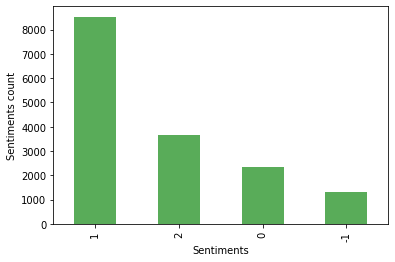

In [ ]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['sentiment'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Sentiments count')
plt.show()

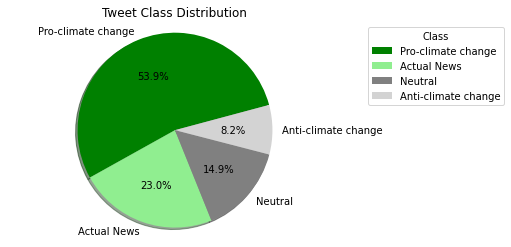

In [ ]:

data = df_train['sentiment'].value_counts()

#my_labels = '1','2','0','-1'
my_labels = 'Pro-climate change', 'Actual News', 'Neutral', 'Anti-climate change'
my_colors = ['green','lightgreen','grey', 'lightgrey']
plt.pie(data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors)
plt.title('Tweet Class Distribution')
plt.axis('equal')

# Adding legend
plt.legend(my_labels,
          title ="Class",
          loc ="top left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

>From the codes above the sentiment feature has four unique classes 1, 2,  0, -1. Most observations are pro climate change indicated by 1. There is also an indication of class imbalance i.e. the number of observations across the classes is unevenly distributed.

### 3.4 Put in Word Cloud Below

In [ ]:
# Create new dataframe for word cloud
df_train_cloud = df_train.copy()
df_train_cloud.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The use of preprocessed data in Word Cloud makes it easy to identify the relevant words as opposed to many instances of https and other types of noise. 

In [ ]:
# Preproceessing functions
def preprocess_tweet(df, col):
    """ Functions takes in a pandas dataframe and performs a series of steps on 
        the tweet/message/text column"""
    # Converting the whole text to lowercase
    df[col] = df[col]. apply(lambda x: x.lower())

    # Removing the twitter usernames from tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'http\S+', ' ', x))

    # Deleting everything that is not characters
    df[col] = df[col]. apply(lambda x: re.sub(r'[^a-z A-Z]', ' ', x))

    # Deleting any word which is less than 3-characters mostly those are stopwords
    df[col] = df[col]. apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

    # Stripping extra spaces in the text
    df[col] = df[col]. apply(lambda x: re.sub(r' +', ' ', x))
    
    return df

preprocess_tweet(df_train_cloud, 'message')

df_train_cloud.head()




,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn think carbon diox...,625221
1,1,not like lack evidence anthropogenic global w...,126103
2,2,researchers say have three years act climate ...,698562
3,1,todayinmaker wired was pivotal year the war c...,573736
4,1,and racist sexist climate change denying bigo...,466954


(-0.5, 399.5, 199.5, -0.5)

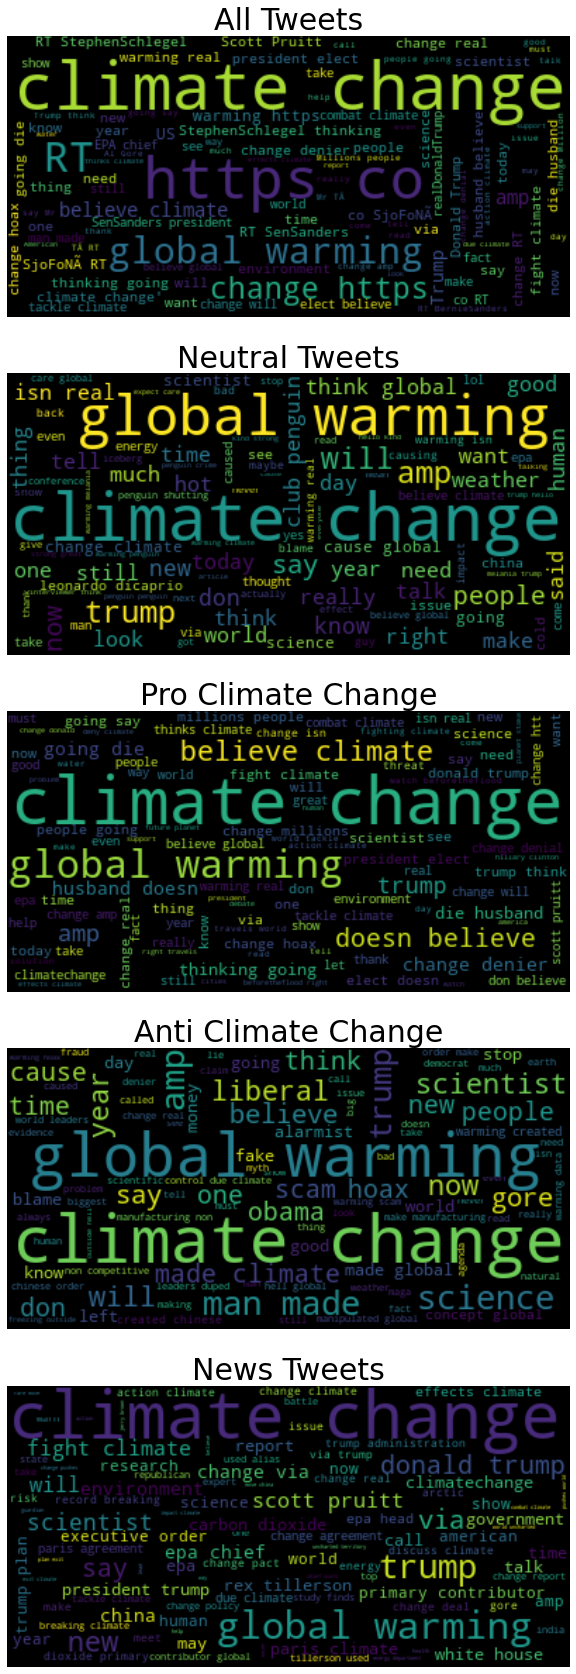

In [ ]:
# Create DataFrame for Each Sentiment
df_sent1 = df_train_cloud[df_train_cloud['sentiment']==1]
df_sent0 = df_train_cloud[df_train_cloud['sentiment']==0]
df_sentneg = df_train_cloud[df_train_cloud['sentiment']==-1]
df_sent2 = df_train_cloud[df_train_cloud['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:

- Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change.
- The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model.
- There is a need to reduce the categories in sentiment feature because the goal is to define whethere there is a positive sentiment or not.

###3.6 Key Insights from EDA 
>* The tweets contain punctuation marks and web urls.
>* The tweet text is in mixed case version i.e. both lower and uppercase.
>* The dataset contains three columns (sentiments, message and tweetid)
>* Sentiments and tweetid are of numeric data type, while message is non-numeric
>*Tweetid is a column with uniques values across the entire rows of the dataset
>* Sentiments columns contains for different unique class (-1, 0, 1 &2) with different sizes.
>* The is uneven distribution of observations among the classes in the sentiment column.
>* The key words in the word cloud include climate change, global warming, believe climate, trump.

###3.7 What's next?
Based on the insights from EDA the following steps will be executed in the data engineering section:-

>* Creation of new features to inform text preprocessing
>* Text preprocessing will be done as follows:-
>>* Text cleaning
>>* Tokenization
>>* Stemming
>>* Lemmatization
>>* Bag of words

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

>**What is feature engineering?**

>Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches. It involves selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

> A **feature** is any measurable input that can be used in a predictive model. 

> It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering consists of various process:-

>**1. Feature Creation:**  Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features. 

>**2. Transformations:** Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

>**3. Feature Extraction:** Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.

>**4. Benchmark :** A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It’s a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines or different approaches like bagging and boosting. 

>**Why is feature engineering important?**

> The features designed during feature engineering are used in an algorithm in order to improve its performance, or in other words reap better results. Feature engineering takes up a huge amount of time of the entire ML process as it is important to make models accurate.

>><img src ="https://drive.google.com/uc?id=1-AhShBG5m5Uu_CTpmsXAUVu5ucPJwQWE " width = "450" height = '200'/>

>In the current project the following processes will be carried out:-

>**1. Feature creation:-** new features such as number of stopwords, number of unique words and punctuations in the text will be created.

>**2. Feature transformations:-** the text feature will be transformed by removing urls, punctuation, stopwords, stemming, lemmatization and conversion of texts into numerics.

> The above processes will aid the ML algorithms to understand the features and improve the accuracy of the algothrims.


###4.1 Text Cleaning



####4.1.1 Removing Noise
>The real world data contains irrelevant or meaningless data termed as noise which can significantly affect various data
analysis tasks of machine learning are classification, clustering and association analysis.Therefore, by removing noise, only the necessary data for analysis is left. For the given dataset, we identified that the *message* column contains the novel tweet for each userid, which we are espected to classify. 
For us to proceed we have to carry out cleaning on this messages. This cleaning will be achieved through:
* identify and remove web-urls from the main message 
* idendify and remove words started with '#'
* idendify and remove words started with '@'
* making everything lower case
* removing punctuation
* remove new lines (\n) from the start of any words


##### 4.1.1.1 Remove web-url from message

>In removing web_url we use regular expressions.Regular Expressions, also known as “regex” or “regexp”, are used to match strings of text such as particular characters, words, or patterns of characters. They aid in matching and extracting any string pattern from the text.

>We write a function called *delete_url* that uses regex to identify web-url in a column and remove same from the column.

In [ ]:
def delete_url(data, col):
    """
        Accepts a dataframe and col., removes web urls from the col.
        returns a new dataframe 
    """
    df = data.copy()
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ''
    df[col] = df[col].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

In [ ]:
# Create a new dataframe with message column void of url links
new_df_train = delete_url(df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
# Confirm that the above operation was successful 
new_df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable"

In [ ]:
df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

##### 4.1.1.2 Remove '#' and '@' words

>We write a function *delete_tags*, to identify and remove words started with '#' and '@' using regex.

In [ ]:
def delete_tags(data, col):
    """
        This function takes in a dataframe and a column, removes all words started with '#' and '@' in the column,
        and returns a new dataframe
    """
    df = data.copy()
    pattern_tags = r'#\w+[#?]'
    pattern_2 = r'@\w+'
    subs_tag = ''
    df[col] = df[col].replace(to_replace = pattern_tags, value = subs_tag, regex = True)
    df[col] = df[col].replace(to_replace = pattern_2, value = subs_tag, regex = True)
    return df

In [ ]:
# Create a new dataframe with message column void of url links
new_df_train = delete_tags(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT : Researchers say we have three years to ac...,698562
3,1,WIRED : 2016 was a pivotal year in the war on...,573736
4,1,"RT : It's 2016, and a racist, sexist, climate ...",466954


##### 4.1.1.3 Convert capitalized words to lowercase words

>We write a function *word_converter* to convert capitalized words to lowercase words using the string method .lower().

In [ ]:
def word_converter(data, col):
    """
        This function takes in a dataframe and col, converts all capitalized words in the column to lowercase,
        and returns a new dataframe.
    """
    df = data.copy()
    df[col] = df[col].str.lower()
    return df

In [ ]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = word_converter(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,wired : 2016 was a pivotal year in the war on...,573736
4,1,"rt : it's 2016, and a racist, sexist, climate ...",466954


##### 4.1.1.4 Remove punctuation

>We write a function *remove_punc* that uses the string package from python to remove punctions.

In [ ]:
def remove_punc(data, col):
    """
        This function takes in a dataframe and a column, uses python string package to identify and remove all
        punctions in the column. It returns a new dataframe
    """
    def operation(post):
        return ''.join([l for l in post if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [ ]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_punc(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,wired 2016 was a pivotal year in the war on ...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


##### 4.1.1.5 Remove new lines (\n) from the start of any words

>We noticed that some words start with '\n' and this is a short form for new line in programming, words started with \n looses its original meaning.

>Hence we write a function remove_new_line to execute this task.

In [ ]:
def remove_new_line(data, col):
    """
        Takes in a dataframe and a column, returns a new dataframe with a new column void of new line command
    """

    def operation(text):
        result = re.sub("\n", "", text)
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

In [ ]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_new_line(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,wired 2016 was a pivotal year in the war on ...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


###4.2. Tokenisation
>Tokenization refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.
We write a function *tokenizer* to tokenize the words in the message column and store same in a new column named *message_tok*

In [ ]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['message_tok'] = df[col].apply(tokeniser.tokenize)
    return df

In [ ]:
# Create a new column to hold the tokens from message column
new_df_train = tokenizer(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid,message_tok
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat..."


### 4.3 Stemming
>Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language.

>We write a function *stem_words* to transform all words in the *message_tok* column to its root form.

In [ ]:
def stem_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of SnowballStemmer class from the nltk package.
        Returns a new dataframe with an additional column "message_stem"
    """
    stemmer = SnowballStemmer('english')
    def operation(words, stemmer):
        return [stemmer.stem(word) for word in words]
    
    df = data.copy()
    df["message_stem"] = df[col].apply(operation, args=(stemmer, ))
    
    return df

In [ ]:
# Create a new column to hold root words from stemmer
new_df_train = stem_words(new_df_train, 'message_tok')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,..."


### 4.4 Lemmatization
>Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

>We write a function *lam_words* to transform all words in the *message_tok* column to its root form using Lemmatization, to enable us acrter for the shortfall in stemming above.

In [ ]:
def lam_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of WordNetLemmatizer class from the nltk package.
        Returns a new dataframe with an additional column "message_lam"
    """
    lemmatizer = WordNetLemmatizer()
    def operation(words, lemmatizer):
        return [lemmatizer.lemmatize(word) for word in words] 
    df = data.copy()
    df["message_lam"] = df[col].apply(operation, args=(lemmatizer, ))
    
    return df

In [ ]:
# Create a new column to hold root words from stemmer
new_df_train = lam_words(new_df_train, 'message_stem')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,..."


### 4.5. Remove stop words here
>Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. The stop words are removed using the stop words dictionary in the nltk library.

>We use the *remove_stop_words* function.

In [ ]:
def remove_stop_words(data, col):
    """
        Takes a dataframe and a column, creates a new dataframe with a new column no_stop_word from the input
        dataframe and column, returns the new column
    """
    def operation(toks):
        new_toks = [tok for tok in toks if tok not in stopwords.words('english')]
        return new_toks
    
    df = data.copy()
    df['no_stop_word'] = df[col].apply(operation)

    return df

In [ ]:
# Create a new column from message_lam void of stop words
new_df_train = remove_stop_words(new_df_train, 'message_lam')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]"
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.6. Check for the presence of noise as non-alphanumeric worlds

In [ ]:
def word_type_checker(data, col):
    alphanum_count = 0 
    non_alphanum_count = 0
    
    def operation(str_list , alphanum_count ,non_alphanum_count):
        alphanum = alphanum_count
        non_aphanum = non_alphanum_count
#         print(f'past row values: {(alphanum, non_aphanum)}') # for testing 
        for strg in str_list:
            if strg.isalnum():
                alphanum = alphanum + 1
            else:
                non_aphanum = non_aphanum + 1
        
        return (alphanum ,non_aphanum)
    
    for label, sr in data.iterrows():
        (alphanum_count, non_alphanum_count) = operation(sr[col] , alphanum_count, non_alphanum_count)
#         Uncomment the codes below for testing of this function
#         print(f'accumulated values: {(alphanum_count, non_alphanum_count)}') 
#         if label == 20:
#             break
    
    return (alphanum_count, non_alphanum_count)

In [ ]:
(alphanumeric, non_alphanumeric) = word_type_checker(new_df_train, 'no_stop_word')
(alphanumeric, non_alphanumeric)

(166688, 9878)

### 4.7. Transforming text into numbers

##### 4.7.1 Convert processed words to corpus*

>Before we can transform the words in numeric type, for each column we have to remove the delimeters introduced during tokennization. This process is needed to enable us form a **corpus**.
To achieve this, we write a function **form_corpus**.

In [ ]:
def form_corpus(data, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(de_tok), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = data.copy()
    df['de_tok'] = df[col].apply(operation)
    
    return df

In [ ]:
# Create a new column from no_stop_word void of delimeters
new_df_train = form_corpus(new_df_train, 'no_stop_word')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,no_stop_word,de_tok
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...


In [ ]:
# Drop every other columns except sentiment and de_tok columns
df_train_reduced = new_df_train[['sentiment', 'de_tok']]
df_train_reduced.head()

,sentiment,de_tok
0,1,polyscimajor epa chief doesnt think carbon dio...
1,1,like lack evid anthropogen global warm
2,2,rt research say three year act climat chang be...
3,1,wire 2016 wa pivot year war climat chang
4,1,rt 2016 racist sexist climat chang deni bigot ...


#### 4.7.2 Transforming text into numbers

Most models do not work well with text, hence the need to convert our text into numbers. To execute this task and more, we use:
>- **CountVectorizer**


>CountVectorizer has some **hyperparameters** which we can asign desired values to while initialising. The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

>- **TfidfVectorizer**

>TfidfVectorizer has some **hyperparameters** which we can asign desired values to while initialising. The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

In [ ]:
# Initialize an object of CountVectorizer
count_vector = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(1, 2))

In [ ]:
# DO NOT RUN THIS VECTORIZER USING THE DEFAULT max_features hyperparameter setting
# Initialize an object of TfidfVectorizer
tfidf_vector = TfidfVectorizer( analyzer='word', ngram_range=(1, 2))
#tfidf_vector = TfidfVectorizer( stop_words='english', min_df=2, max_df= 0.9, ngram_range=(1, 5), analyzer= 'char')

#### 4.7.3 Vectorizer Countainer

We proceed to store the two vectorizers (CountVectorizer and TFidfVecorizer ) in a container( python list) named **VectorizerSelector**, which enables us to use index number (0,1), to select any vectorizer of choice 

In [ ]:
# Define VectorizerSeelector, a list of defined vectorizer, and selects the desired vectorizer with index number,
# store the selected vectorizer in a variable named vector.

VectorizerSelector = [count_vector , tfidf_vector]

vector = VectorizerSelector[0]

### 4.8. Resampling
> During EDA we discovered that our data had imbalanced class distribution. This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. This could result in our predictive model being biased and inaccurate. The model will tend to only predict the majority class data and ignore the minority class which will be treated as noise. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

> This can be corrected by:-
- **Downsampling the majority class:-**Random Undersampling/Downsampling aims to balance class distribution by randomly eliminating majority class observations. This is done until the majority and minority class instances are balanced out.

>>>**Advantages:-**
>>>>1. It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

>>>**Disadvantages:-**
>>>>1. It can discard potentially useful information which could be important for building rule classifiers.

>>>>2. The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

>- **Upsampling the minority class:-**Over-Sampling/Upsampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

>>>**Advantages**

>>>>1. Unlike under sampling this method leads to no information loss.
>>>>2. Outperforms under sampling

>>>**Disadvantages**
>>>>1. It increases the likelihood of overfitting since it replicates the minority class events.

>To achieve the above, we write a multipurpose function called **resampler**, which we can use for both **Downsampling** and **Upsampling**

In [ ]:
def resampler(df_list, n_sample, replace=False):
    """
        This function takes a list of dataframe, the size which we intend to resize all dataframes in the list to, and
        an optional replace[bool] value, which is set to True for upsampling
        It returns a tuple of new dataframes with sizes equivalent to the value for n_sample
    """
    
    def operation(df):
        downsampled_df = resample(df,
                          replace= replace, # sample without replacement (no need to duplicate observations)
                          n_samples=n_sample, # match number in minority class
                          random_state= RANDOM_STATE) # reproducible results
        return downsampled_df
    
    resampled_dfs = tuple(map(operation , df_list))
    
    return resampled_dfs

#### 4.8.1 Create new dataframes

We create new dataframes basedd on sentiment type.

In [ ]:
pro = df_train_reduced[df_train_reduced['sentiment'] == 1]
anti = df_train_reduced[df_train_reduced['sentiment'] == -1]
neutral = df_train_reduced[df_train_reduced['sentiment'] == 0]
info =  df_train_reduced[df_train_reduced['sentiment'] == 2]

#### 4.8.2 Downsampling
    

In [ ]:
# Downsample pro, infor and neutral dataframe 
(pro_df, info_df, neut_df) = resampler([pro,info,neutral], len(anti))

# Combine downsampled majority class with minority class
downsampled = pd.concat([pro_df, info_df, neut_df,anti])

# Check new class counts
downsampled['sentiment'].value_counts()

 1    1296
 2    1296
 0    1296
-1    1296
Name: sentiment, dtype: int64

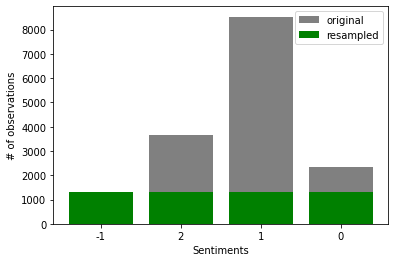

In [ ]:
# visualise the downsampled dataframe
original_height = [len(pro), len(neutral), len(info), len(anti)]
downsampled_heights = [len(downsampled[downsampled['sentiment']==1]),len(downsampled[downsampled['sentiment']==0]),
                      len(downsampled[downsampled['sentiment']==2]) ,len(downsampled[downsampled['sentiment']==-1])]

# Get all possible labels
labels = downsampled['sentiment'].unique()
plt.bar(labels,original_height,color='grey')
plt.bar(labels,downsampled_heights,color='green')
plt.xticks(labels,[1,0, 2, -1])
plt.ylabel("# of observations")
plt.xlabel("Sentiments")
plt.legend(['original','resampled'])
plt.show()

#### 4.8.3 Upsampling

In [ ]:
# upsample info, neutral and anti dataframe 
(up_info_df, up_neut_df, up_anti_df) = resampler([info,neutral, anti], len(pro), True)

# Combine downsampled majority class with minority class
upsampled = pd.concat([pro, up_info_df, up_neut_df,up_anti_df])

# Check new class counts
upsampled['sentiment'].value_counts()

 1    8530
 2    8530
 0    8530
-1    8530
Name: sentiment, dtype: int64

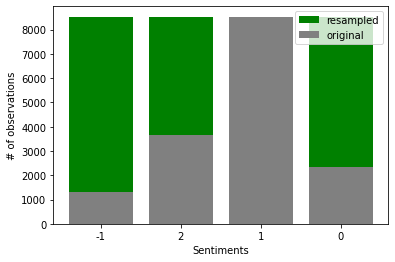

In [ ]:
# visualise the upnsampled dataframe
original_height = [len(pro), len(neutral), len(info), len(anti)]
upsampled_heights = [len(upsampled[upsampled['sentiment']==1]),len(upsampled[upsampled['sentiment']==0]),
                      len(upsampled[upsampled['sentiment']==2]) ,len(upsampled[upsampled['sentiment']==-1])]

# Get all possible labels
labels = upsampled['sentiment'].unique()
plt.bar(labels,upsampled_heights,color='green')
plt.bar(labels,original_height,color='grey')
plt.xticks(labels,[1,0, 2, -1])
plt.ylabel("# of observations")
plt.xlabel("Sentiments")
plt.legend(['resampled', 'original',])
plt.show()

#### 4.8.4 Data container

>From the above two operations, we now have three different data set:
- **df_train_reduced** (original data set)
- **downsampled** (down sampled data set)
- **upsampled** (up sampled data set)

>We then proceed to store these three different data set in a data container named **DataSetSelector**, which enables us select a particular type of data set at a particular time using their respective index numbers (0,1,2), and storing same in a variable called **data_set**

In [ ]:
# Define DataSetSelector, store the data sets, and define data_set, which contains the selected data set
DataSetSelector = [df_train_reduced, downsampled, upsampled]

data_set = DataSetSelector[2]

### 4.9. Data Transformation 

We proceed to transform the features of the data set (**data_set**), with our choosen vectorizer **vector**, and store the transformed 
data in a variable called X_count

In [ ]:
# Fit and Transform the de_tok column fit_transform method
X_count = vector.fit_transform(data_set['de_tok'].values.astype(str))
X_count.shape

(34120, 20000)

#### 4.9.1 Extract dependant for data set

In [ ]:
# Collect the dependant variable into a variable
y = data_set['sentiment']
y[:10]

0     1
1     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: sentiment, dtype: int64

#### 4.9.2 Convert vectorised data set back to dataframe form

In [ ]:
model_df = pd.DataFrame(data=X_count.toarray(),columns = vector.get_feature_names())
model_df.head()

### 4.10 Section Summary
> In this section the train data has been preprocessed by removing stopwords, tokenized, stemmed, lemmatized, resampled and final converted the text to numerics. 20000 top occuring features have been selected for model analysis.

## 5. Preprocessing the test data

>To enable us make prediction with our model, we have to import the **test** dataset and execute all data engineering operation executed on the **train** dataset.

>These activities are: 
- **delete urls**
- **delete tags**
- **convert words to lowercases**
- **remove punctions**
- **remove newlines**
- **tokenize**
- **stemming**
- **larmming**
- **remove stop words**

In [ ]:
# Create a new dataframe with message colun void of url links
new_df_test = delete_url(df_test, 'message')
new_df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [ ]:
# Create a new dataframe with message colun void of url links
new_df_test = delete_tags(new_df_test, 'message')
new_df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,\nPutin got to you too Jill ! \nTrump does...,476263
4,RT : 'Female orgasms cause global warming!'\n-...,872928


In [ ]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_test = word_converter(new_df_test, 'message')
new_df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,\nputin got to you too jill ! \ntrump does...,476263
4,rt : 'female orgasms cause global warming!'\n-...,872928


In [ ]:
# Create a new dataframe with the message colmn void of punctuations
new_df_test = remove_punc(new_df_test, 'message')
new_df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,\nputin got to you too jill \ntrump doesn...,476263
4,rt female orgasms cause global warming\nsarca...,872928


In [ ]:
# Create a new dataframe with the message column void of punctuations
new_df_test = remove_new_line(new_df_test, 'message')
new_df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,putin got to you too jill trump doesnt be...,476263
4,rt female orgasms cause global warmingsarcast...,872928


In [ ]:
# Create a new column to hold the tokens from message column
new_df_test = tokenizer(new_df_test, 'message')
new_df_test.head()

,message,tweetid,message_tok
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,putin got to you too jill trump doesnt be...,476263,"[putin, got, to, you, too, jill, trump, doesnt..."
4,rt female orgasms cause global warmingsarcast...,872928,"[rt, female, orgasms, cause, global, warmingsa..."


In [ ]:
# Create a new column to hold root words from stemmer
new_df_test = stem_words(new_df_test, 'message_tok')
new_df_test.head()

,message,tweetid,message_tok,message_stem
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europ, will, now, be, look, to, china, to, ma..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combin, this, with, the, poll, of, staffer, r..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[the, scari, unimpeach, evid, that, climat, ch..."
3,putin got to you too jill trump doesnt be...,476263,"[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt..."
4,rt female orgasms cause global warmingsarcast...,872928,"[rt, female, orgasms, cause, global, warmingsa...","[rt, femal, orgasm, caus, global, warmingsarca..."


In [ ]:
# Create a new column to hold root words from stemmer
new_df_test = lam_words(new_df_test, 'message_tok')
new_df_test.head()

,message,tweetid,message_tok,message_stem,message_lam
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europ, will, now, be, look, to, china, to, ma...","[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combin, this, with, the, poll, of, staffer, r...","[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[the, scari, unimpeach, evid, that, climat, ch...","[the, scary, unimpeachable, evidence, that, cl..."
3,putin got to you too jill trump doesnt be...,476263,"[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt..."
4,rt female orgasms cause global warmingsarcast...,872928,"[rt, female, orgasms, cause, global, warmingsa...","[rt, femal, orgasm, caus, global, warmingsarca...","[rt, female, orgasm, cause, global, warmingsar..."


In [ ]:
# Create a new column from message_lam void of stop words
new_df_test = remove_stop_words(new_df_test, 'message_lam')
new_df_test.head()

,message,tweetid,message_tok,message_stem,message_lam,no_stop_word
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europ, will, now, be, look, to, china, to, ma...","[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combin, this, with, the, poll, of, staffer, r...","[combine, this, with, the, polling, of, staffe...","[combine, polling, staffer, climate, change, w..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[the, scari, unimpeach, evid, that, climat, ch...","[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,putin got to you too jill trump doesnt be...,476263,"[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, jill, trump, doesnt, believe, cli..."
4,rt female orgasms cause global warmingsarcast...,872928,"[rt, female, orgasms, cause, global, warmingsa...","[rt, femal, orgasm, caus, global, warmingsarca...","[rt, female, orgasm, cause, global, warmingsar...","[rt, female, orgasm, cause, global, warmingsar..."


In [ ]:
# Create a new column from no_stop_word void of delimeters
new_df_test = form_corpus(new_df_test, 'no_stop_word')
new_df_test.head()

,message,tweetid,message_tok,message_stem,message_lam,no_stop_word,de_tok
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europ, will, now, be, look, to, china, to, ma...","[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...",europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combin, this, with, the, poll, of, staffer, r...","[combine, this, with, the, polling, of, staffe...","[combine, polling, staffer, climate, change, w...",combine polling staffer climate change woman r...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[the, scari, unimpeach, evid, that, climat, ch...","[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...",scary unimpeachable evidence climate change al...
3,putin got to you too jill trump doesnt be...,476263,"[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, jill, trump, doesnt, believe, cli...",putin got jill trump doesnt believe climate ch...
4,rt female orgasms cause global warmingsarcast...,872928,"[rt, female, orgasms, cause, global, warmingsa...","[rt, femal, orgasm, caus, global, warmingsarca...","[rt, female, orgasm, cause, global, warmingsar...","[rt, female, orgasm, cause, global, warmingsar...",rt female orgasm cause global warmingsarcastic...


In [ ]:
# Drop every other columns except sentiment and de_tok columns
df_test_reduced = new_df_test[[ 'de_tok']]
df_test_reduced.head()

,de_tok
0,europe looking china make sure alone fighting ...
1,combine polling staffer climate change woman r...
2,scary unimpeachable evidence climate change al...
3,putin got jill trump doesnt believe climate ch...
4,rt female orgasm cause global warmingsarcastic...


### 5.1 Transform test dataset 

We transform the test dataset using the chosen vectorizer ***vector** from the vectorizer section above

In [ ]:
# Transform the de_tok column
X_count_test = vector.transform(df_test_reduced['de_tok'].values.astype(str))
X_count_test.shape

(10546, 20000)

In [ ]:
text_df = pd.DataFrame(data=X_count_test.toarray(),columns = vector.get_feature_names())
text_df.head()

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### 6.1 Spliting of data set
Before we proceed to modelling, we have to split our data set into two sets (Training and Testing), to enable us internally evaluate the respective performance of our models. to achive this, we make use of sklearn train_test_split class.

In [ ]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.3, random_state=RANDOM_STATE)

### 6.2 Model and model evaluation

We write a function **model_eval**, that uses the training and test features and labels data set generated above, to train a model, make prediction with the model, and output the models performance with the aid of **classification_report** from sklearn.

In [ ]:
def model_eval(model):
    """
        This function accepts a model as an input, train and make predictions with the model, using the train and test
        data set generated above, and ouput the trained model and the model's performance as a tuple.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    return (model, classification_report(y_test, y_pred))

In [ ]:
def eval_metrics(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  accuracy  = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
  recall    = metrics.recall_score(y_test, y_pred, average = 'weighted')
  f1_test   = metrics.f1_score(y_test, y_pred, average = 'weighted') 

  return accuracy, precision, recall, f1_test  


### 6.3 Models used
#### 6.3.1. Logistic Regression:-

>  This is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

>  It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

>**Logistic Regression Assumptions**

>i. Binary logistic regression requires the dependent variable to be binary.

>ii. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

>iii. Only the meaningful variables should be included.

>iv. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

>v. The independent variables are linearly related to the log odds.

>vi. Logistic regression requires quite large sample sizes.

>Logistic regression is a linear classifier, and so a linear function such as 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ is used, also called the logit. The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.

>The logistic regression function 𝑝(𝐱) is the sigmoid function of :-

\begin{align}
        \text{𝑓(𝐱): 𝑝(𝐱) = }\left. \frac{1}{1 + exp(−𝑓(𝐱)} \right.
    \end{align}

>As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

>Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called model training or fitting.

>To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation:-

\begin{align}
        \text{LLF = }\left. {Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ)))} \right.
    \end{align}

>When 𝑦ᵢ = 0, the LLF for the corresponding observation is equal to log(1 − 𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, then log(1 − 𝑝(𝐱ᵢ)) is close to 0. This is the result you want. If 𝑝(𝐱ᵢ) is far from 0, then log(1 − 𝑝(𝐱ᵢ)) drops significantly. You don’t want that result because your goal is to obtain the maximum LLF. Similarly, when 𝑦ᵢ = 1, the LLF for that observation is 𝑦ᵢ log(𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 1, then log(𝑝(𝐱ᵢ)) is close to 0. If 𝑝(𝐱ᵢ) is far from 1, then log(𝑝(𝐱ᵢ)) is a large negative number.

>There’s one more important relationship between 𝑝(𝐱) and 𝑓(𝐱), which is that log(𝑝(𝐱) / (1 − 𝑝(𝐱))) = 𝑓(𝐱). This equality explains why 𝑓(𝐱) is the logit. It implies that 𝑝(𝐱) = 0.5 when 𝑓(𝐱) = 0 and that the predicted output is 1 if 𝑓(𝐱) > 0 and 0 otherwise.

>**Logistic regression hyperparameter**

>Logistic regression does not really have any critical hyperparameters to tune. However it is useful to see differences in performance or convergence with different solvers (solver).

>>**solver** in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’].

>>**penalty** in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’].Regularization (penalty) can sometimes be helpful.
>**Note:** not all solvers support all regularization terms.

>>**C** in [100, 10, 1.0, 0.1, 0.01]. The C parameter controls the penality strength, which can also be effective.









In [ ]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(multi_class='ovr')

# Train, predict and evaluate model performance 
(logreg_model, model_per) = model_eval(logreg_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.96      0.98      0.97      2620
           0       0.87      0.94      0.91      2458
           1       0.90      0.75      0.82      2576
           2       0.88      0.93      0.91      2582

    accuracy                           0.90     10236
   macro avg       0.90      0.90      0.90     10236
weighted avg       0.90      0.90      0.90     10236



In [ ]:
eval_metrics(logreg_model)

(0.9031848378272763,
 0.9035903198550137,
 0.9031848378272763,
 0.9012510544769582)

In [ ]:
params = {"random_state": 42,
          "model_type": "logreg",
          "stratify": True
          }
metrics = {"f1": f1_test,
           "recall": recall,
           "precision": precision,
           "accuracy": accuracy
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jwangombe11/advance-classification-predict/001a99e611d1429e84efc8ce53312a03
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.8361664712778429
COMET INFO:     f1        : 0.8357923607454006
COMET INFO:     precision : 0.8369359625639987
COMET INFO:     recall    : 0.8361664712778429
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1PTkQtLt8dUudO9fH01UbTA_tGXU_hkds
COMET INFO:   Parameters:
COMET INFO:     C                                  : 1.0
COMET INFO:     alpha                              : 0.001
COMET INFO:     average                            : False
COMET INFO:     bootstrap                          : True
COMET INFO:

#### 6.3.2. Passive Aggresive classifier:-

>Is an online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step by feeding its instances sequentially, individually or in small groups called mini-batches, as opposed to batch learning, where the entire training dataset is used at once. In online learning, a machine learning model is trained and deployed in production in a way that continues to learn as new data sets arrive.

>**How Passive-Aggressive Algorithms Work:**

>Passive-Aggressive algorithms are called so because :

>>**Passive**: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 

>>**Aggressive**: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

>**Important parameters:**

>>**C** : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction

>>**max_iter** : The maximum number of iterations the model makes over the training data.

>>**tol** : The stopping criterion. If it is set to None, the model will stop when *(loss > previous_loss  –  tol)*. By default, it is set to *1e-3*.

In [ ]:

# instantiate a logistic regression model
pac_model = PassiveAggressiveClassifier()

# Train, predict and evaluate model performance 
(pac_model, model_per) = model_eval(pac_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.96      0.99      0.98      2620
           0       0.88      0.96      0.92      2458
           1       0.91      0.77      0.84      2576
           2       0.90      0.94      0.92      2582

    accuracy                           0.91     10236
   macro avg       0.91      0.91      0.91     10236
weighted avg       0.91      0.91      0.91     10236



#### 6.3.3. Support Vector Machines:- 

>This is one of the most popular and widely used supervised machine learning algorithms. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

>>><img src ="https://drive.google.com/uc?id=1DnJJj2SzhS8xqj7beQLwDO3hu6s3cp_O " width = "250" height = '200'/>

>**Support Vectors**
>This are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

>**Hyperplane**
>This is a decision plane which separates between a set of objects having different class memberships.

>**Margin**
>A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

>The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

>> a. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

>>b. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

>**SVM Hyperparameters**

>>**Kernel:** The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

>>**Regularization:** Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This controls the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

>>**Gamma:** A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

>**Advantages**

>SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

>**Disadvantages**

>SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [ ]:
# instantiate a logistic regression model
svc_model = SVC()

# Train, predict and evaluate model performance 
(svc_model, model_per) = model_eval(svc_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.98      0.97      0.97      2620
           0       0.86      0.93      0.89      2458
           1       0.87      0.78      0.82      2576
           2       0.88      0.91      0.90      2582

    accuracy                           0.90     10236
   macro avg       0.90      0.90      0.90     10236
weighted avg       0.90      0.90      0.90     10236



#### 6.3.4 RandomForest Classification Model

>This is a supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
It utilizes the Ensemble technique which involves combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

>Ensemble uses two types of methods:

1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

>> <img src ="https://drive.google.com/uc?id=1VnR67-fAJA9B_q77wSpQtG82RaS-s3zI " width = "500" height = '250'/>

>**Important Hyperparameters**

>Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

> Following hyperparameters increases the predictive power:

1. **n_estimators**– number of trees the algorithm builds before averaging the predictions.

2. **max_features**– maximum number of features random forest considers splitting a node.

3. **mini_sample_leaf**– determines the minimum number of leaves required to split an internal node.

> Following hyperparameters increases the speed:

1. **n_jobs**– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. **random_state**– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. **oob_score** – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.



In [ ]:
# instantiate a logistic regression model
randomF_model = RandomForestClassifier()

# Train, predict and evaluate model performance 
(randomF_model, model_per) = model_eval(randomF_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2620
           0       0.85      0.97      0.91      2458
           1       0.93      0.74      0.82      2576
           2       0.90      0.95      0.92      2582

    accuracy                           0.91     10236
   macro avg       0.91      0.91      0.91     10236
weighted avg       0.91      0.91      0.91     10236



#### 6.3.5 Multinomial Naive Bayes
>Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of tweet, email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

>It belongs to a family of algorithms that share one common principle, that is each feature being classified is not related to any other feature.

>The algorithm is based on Bayes theorem, formulated by Thomas Bayes, it calculates the probability of an event occurring based on the prior knowledge of conditions related to an event. It is based on the following formula:

\begin{align}
        \text{P(A|B) = }\left. \mathbf{P(A)} \cdot \mathbf{\frac{P(B|A)}{P(B)}} \right.
    \end{align}

>Where we are calculating the probability of class A when predictor B is already provided.

>**P(B)** = prior probability of B

>**P(A)** = prior probability of class A

>**P(B|A)** = occurrence of predictor B given class A probability

>This formula helps in calculating the probability of the tags in the text.

>**Advantages**

> 1. It is easy to implement as you only have to calculate probability.
> 2. You can use this algorithm on both continuous and discrete data.
> 3. It is simple and can be used for predicting real-time applications.
> 4. It is highly scalable and can easily handle large datasets.

>**Disadvantages**

> 1. The prediction accuracy of this algorithm is lower than the other probability algorithms.
> 2. It is not suitable for regression. Naive Bayes algorithm is only used for textual data classification and cannot be used to predict numeric values.

>**Important Hyperparameter**
alpha hyperparameter and the fundamental tradeoff
High alpha  underfitting

We are adding large counts to everything and so we are diluting the signal in the data

Low alpha  overfitting

In [ ]:

# Instanciate a RandomForestClassification model
mnb_model = MultinomialNB()

# Train, predict and evaluate model performance 
(mnb_model, model_per) = model_eval(mnb_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.94      0.92      0.93      2620
           0       0.84      0.78      0.81      2458
           1       0.74      0.74      0.74      2576
           2       0.82      0.90      0.86      2582

    accuracy                           0.84     10236
   macro avg       0.84      0.84      0.84     10236
weighted avg       0.84      0.84      0.84     10236



#### 6.3.6. Key Insights 
>Both Passive Aggressive Classifier and Random Forest model have an accuracy of 0.91. The Passive Aggressive Classifier has F1-scores ranging from 0.84 to 0.98 across the classes while the Random Forest Classifier F1-scores range from 0.82 to 0.98 across the classes. 

>The least performing model was the MultinomialNB with an accuracy of 0.84 and F!-score ranging from 0.74 to 0.93 across the classes.

### 6.4 Hyperparameter tuning
In machine learning, hyperparameter tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. In this section we will be optimizing the hyper parameters of the models used above to try and improve the accuracy of the model. We utilize the GridSearch to find optimal hyperparameters.

#### 6.4.1 Logistic Regression

In [ ]:
# Model
lr = LogisticRegression(multi_class='ovr')

# Hyperparameters to GridSearch
penalty = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10]

# Store hyperparameters in a dictionary
parameters = {
    'penalty' : penalty,
    'C' :Cs
}

# Instanciate a GridsearchCV and train same with 
logreg_model_ht = GridSearchCV(lr, parameters)

# Train, predict and evaluate model performance 
(logreg_model_ht, model_per) = model_eval(logreg_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2620
           0       0.88      0.96      0.92      2458
           1       0.92      0.77      0.84      2576
           2       0.89      0.94      0.92      2582

    accuracy                           0.92     10236
   macro avg       0.92      0.92      0.92     10236
weighted avg       0.92      0.92      0.92     10236



In [ ]:
logreg_model_ht.best_params_

{'C': 10, 'penalty': 'l2'}

#### 6.4.2 Passive Aggressive Classifier

In [ ]:
# instantiate a logistic regression model
pac_model = PassiveAggressiveClassifier()

# Create and store hyperparameters values
Cs = [0.001, 0.01, 0.1, 1, 10]

# Store hyperparameters in a dictionary
parameters = {
    'C' : Cs,
}

# Instanciate a GridsearchCV and train same with 
pac_model_ht = GridSearchCV(pac_model, parameters)

# Train, predict and evaluate model performance 
(pac_model_ht, model_per) = model_eval(pac_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2620
           0       0.88      0.96      0.92      2458
           1       0.92      0.78      0.84      2576
           2       0.90      0.94      0.92      2582

    accuracy                           0.92     10236
   macro avg       0.92      0.92      0.91     10236
weighted avg       0.92      0.92      0.91     10236



In [ ]:
pac_model_ht.best_params_

{'C': 10}

#### 6.4.3 Support Vector Machine

In [ ]:
# instantiate a Support Vector Machine model

svc = SVC()


# Create and store hyperparameters values
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

# Store hyperparameters in a dictionary
parameters = {
    'C' : Cs,
    'gamma' : gammas
}

# Instanciate a GridsearchCV and train same with 
svc_model_ht = GridSearchCV(svc, parameters)

# Train, predict and evaluate model performance 
(svc_model_ht, model_per) = model_eval(svc_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2620
           0       0.92      0.96      0.94      2458
           1       0.92      0.83      0.88      2576
           2       0.92      0.95      0.93      2582

    accuracy                           0.93     10236
   macro avg       0.93      0.93      0.93     10236
weighted avg       0.93      0.93      0.93     10236



In [ ]:
svc_model_ht.best_params_

{'C': 10, 'gamma': 0.1}

#### 6.4.4. Random Forest Classifier

In [ ]:
# Instanciate a RandomForestClassification model
randomF_model_ht = RandomForestClassifier(n_estimators=100, random_state=42)

# Train, predict and evaluate model performance 
(randomF_model_ht, model_per) = model_eval(randomF_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2620
           0       0.86      0.97      0.91      2458
           1       0.93      0.75      0.83      2576
           2       0.90      0.95      0.92      2582

    accuracy                           0.91     10236
   macro avg       0.91      0.91      0.91     10236
weighted avg       0.92      0.91      0.91     10236



#### 6.4.5. MultinomialNB

In [ ]:


# Instanciate a RandomForestClassification model
mnb_model_ht = MultinomialNB(alpha=0.001)

# Train, predict and evaluate model performance 
(mnb_model_ht, model_per) = model_eval(mnb_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

          -1       0.94      0.96      0.95      2620
           0       0.86      0.85      0.85      2458
           1       0.79      0.76      0.78      2576
           2       0.87      0.90      0.88      2582

    accuracy                           0.87     10236
   macro avg       0.87      0.87      0.87     10236
weighted avg       0.87      0.87      0.87     10236



#### 6.4.6. Key Insights 
>The best model is the SVM model with hyperparameters tuned to (gamma=0.1, C=10). It had an acurracy of 0.93 and an F1-score ranging from 0.88 to 0.98 across the classes. This was followed by the logistic regression that had the following hyper parameter ('C': 10, 'penalty': 'l2'). It had an accuracy of 0.92 and F1-score ranging from 0.84 to 0.98 accross the classes. 

>The least performing model was the MultinomialNB with the *alpha* hyperparameter tuned to 0.001. It had an accuracy of 0.87 and F!-score ranging from 0.78 to 0.95 across the classes.

### 6.5 Make predictions with the models generated above for kaggle submission :
We have generated predictions for five different models above:
- **y_pred_logistic** (Logistics Regression model)
- **y_pred_pac** (Passive Aggressive Classifier
- **y_pred_svc** (SVC model)
- **y_pred_random** (RandomForestClasifier model)
- **y_pred_mnb** (MultinomialNB)


#### 6.5.1 Logistic Regression Model

In [ ]:
# Make prediction with logistics regression model and the test data
y_pred_logistic = logreg_model.predict(X_count_test)

In [ ]:
y_pred_logistic_ht = logreg_model_ht.predict(X_count_test)

#### 6.5.2 Passive Aggressive Classifier

In [ ]:
# Make prediction with logistics regression model and the test data
y_pred_pac = pac_model.predict(X_count_test)

In [ ]:
# Make prediction with logistics regression model and the test data
y_pred_pac_ht = pac_model_ht.predict(X_count_test)

#### 6.5.3. Support Vector Machines

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_svc = svc_model.predict(X_count_test)

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_svc_ht = svc_model_ht.predict(X_count_test)

#### 6.5.4 RandomForestClasifier Model

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_random = randomF_model.predict(X_count_test)

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_random_ht = randomF_model_ht.predict(X_count_test)

#### 6.5.5 MultinomialNB  Model

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_mnb = mnb_model.predict(X_count_test)

In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_mnb_ht = mnb_model_ht.predict(X_count_test)

### 6.6 Conversion of the predicted results to csv for Kaggle submission

We have generated predictions for five different models above:
- **y_pred_logistic** (Logistics Regression model)
- **y_pred_pac** (Passive Aggressive Classifier
- **y_pred_svc** (SVC model)
- **y_pred_random** (RandomForestClasifier model)
- **y_pred_mnb** (MultinomialNB)


#### 6.6.1 Logistics Regression

In [ ]:
# Choose best model and motivate why it is the best choice

df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': y_pred_logistic
})

df.head()

,tweetid,sentiment
0,169760,0
1,35326,1
2,224985,1
3,476263,0
4,872928,0


In [ ]:
df.to_csv('file_lr.csv',index=False)

#### 6.6.2 Passive Aggresive Classifier

In [ ]:
# Choose best model and motivate why it is the best choice

df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': y_pred_pac
})

df.head()

,tweetid,sentiment
0,169760,0
1,35326,1
2,224985,1
3,476263,0
4,872928,2


In [ ]:
df.to_csv('file_pac.csv',index=False)

#### 6.6.3. Support Vector Machines

In [ ]:
upsampled_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': y_pred_svc
})

upsampled_df.head()

,tweetid,sentiment
0,169760,0
1,35326,1
2,224985,0
3,476263,1
4,872928,0


In [ ]:
upsampled_df.to_csv('file_svc.csv',index=False)

#### 6.6.4 RandomForestClasifier Model

In [ ]:
downsampled_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': y_pred_random
})

downsampled_df.head()

,tweetid,sentiment
0,169760,0
1,35326,0
2,224985,0
3,476263,1
4,872928,0


In [ ]:
downsampled_df.to_csv('file_rf.csv',index=False)

#### 6.6.5. MultinomialNB Model

In [ ]:
downsampled_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': y_pred_mnb
})

downsampled_df.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,-1


In [ ]:
downsampled_df.to_csv('file_mnb.csv',index=False)

#### 6.6.6. Summary
> Although the SVC and the Passive Aggressive Classifier performed the best with the traion data when exposed to test data from Kaggle the Logistic Regression with default hyperparameters performed the best with F1-score of 0.73435

<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

## 7.1 Metrics for Model evaluation.
>There are many ways for measuring classification performance. Accuracy and confusion matrix are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

>>1. **Confusion Matrix**

>A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.

>>><img src ="https://drive.google.com/uc?id=1RIgdzp1ysRs0NYpY_VD-g1MUdzOBlNO-" width = "250" height = '200'/>

>>**True Positive**: We predicted positive and it’s true. 

>>**True Negative**: We predicted negative and it’s true. 

>>**False Positive (Type 1 Error)**- We predicted positive and it’s false. 

>>**False Negative (Type 2 Error)**- We predicted negative and it’s false. 


>It is extremely useful for measuring the Recall, Precision and Accuracy.

>>2. **Accuracy**

>This is simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

\begin{align}
        \text{Accuracy = }\left. \frac{TP + TN}{TP + TN + FP + FN} \right.
    \end{align}

>Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes.

>>3. **Recall (Sensitivity)** 

>Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

\begin{align}
        \text{Recall = }\left. \frac{TP}{TP + FN} \right.
    \end{align}

>>4. **F1 Score**

>It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.

\begin{align}
        \text{F1 = }\left. \mathbf{2} \cdot \mathbf{\frac{Precision * Recall}{Precision + Recall}} \right.
    \end{align}

>The F1 score punishes extreme values more. F1 Score could be an effective evaluation metric in the following cases:

>>* When FP and FN are equally costly.
>>* Adding more data doesn’t effectively change the outcome
>>* True Negative is high

In [ ]:
names = ['Logistic Regression', 
         'Passive Aggresive classifier',  
         'Support Vector Machine', 
         'Random Forest', 
         'Multinomial Naive Bayes']

In [ ]:
classifiers = [
    LogisticRegression(multi_class='ovr'),
    PassiveAggressiveClassifier(),
    SVC(),
    RandomForestClassifier(),    
    MultinomialNB()
]

In [ ]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    model = clf.fit(X_train, y_train)
    
    print ('... predicting')   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_test, y_pred_test)
    precision = metrics.precision_score(y_test, y_pred_test, average = 'weighted')
    recall    = metrics.recall_score(y_test, y_pred_test, average = 'weighted')
       
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = 'weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_test, y_pred_test)
    class_report[name] = metrics.classification_report(y_test, y_pred_test)
    
    results.append([name, accuracy, precision, recall, f1_test])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Passive Aggresive classifier model...
... predicting
... scoring
Fitting Support Vector Machine model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
... All done!


In [ ]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Test
Classifier,,,,
Passive Aggresive classifier,0.912173,0.913181,0.912173,0.910106
Random Forest,0.911684,0.914042,0.911684,0.909498
Logistic Regression,0.903185,0.903590,0.903185,0.901251
Support Vector Machine,0.897421,0.897890,0.897421,0.896607
Multinomial Naive Bayes,0.836166,0.836936,0.836166,0.835792


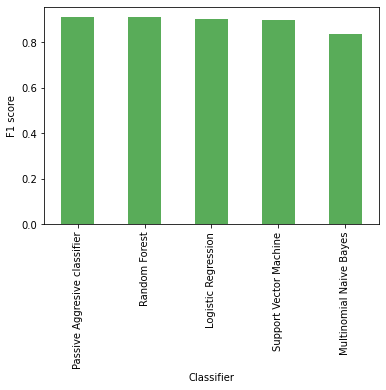

In [ ]:
results.sort_values('F1 Test', ascending=False, inplace=True)
results['F1 Test'].plot(kind = 'bar', facecolor='g', alpha=0.65)
plt.xlabel('Classifier')
plt.ylabel('F1 score')
plt.show()


In [ ]:
names = ['Logistic Regression', 
         'Passive Aggresive classifier',  
         'Support Vector Machine', 
         'Random Forest', 
         'Multinomial Naive Bayes']

In [ ]:
classifiers_ht = [
    LogisticRegression(multi_class='ovr', C = 10, penalty = 'l2'),
    PassiveAggressiveClassifier(C = 0),
    SVC(gamma=0.1, C=10),
    RandomForestClassifier(n_estimators=100, random_state=42),    
    MultinomialNB(alpha=0.001)
]

In [ ]:
results_ht = []

models_ht = {}
confusion_ht = {}
class_report_ht = {}


for name, clf in zip(names, classifiers_ht):    
    print ('Fitting {:s} model...'.format(name))
    model_ht = clf.fit(X_train, y_train)
    
    print ('... predicting')   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy_ht  = metrics.accuracy_score(y_test, y_pred_test)
    precision_ht = metrics.precision_score(y_test, y_pred_test, average = 'weighted')
    recall_ht    = metrics.recall_score(y_test, y_pred_test, average = 'weighted')
       
    f1_test_ht   = metrics.f1_score(y_test, y_pred_test, average = 'weighted')    
    
    # Save the results to dictionaries
    models_ht[name] = clf    
    confusion_ht[name] = metrics.confusion_matrix(y_test, y_pred_test)
    class_report_ht[name] = metrics.classification_report(y_test, y_pred_test)
    
    results_ht.append([name, accuracy_ht, precision_ht, recall_ht, f1_test_ht])

    
results_ht = pd.DataFrame(results_ht, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test'])
results_ht.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Passive Aggresive classifier model...
... predicting
... scoring
Fitting Support Vector Machine model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
... All done!


In [ ]:
results_ht.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Test
Classifier,,,,
Support Vector Machine,0.932982,0.932910,0.932982,0.932138
Logistic Regression,0.917057,0.918027,0.917057,0.915300
Random Forest,0.912857,0.915484,0.912857,0.910600
Multinomial Naive Bayes,0.868210,0.866986,0.868210,0.867357
Passive Aggresive classifier,0.255959,0.065515,0.255959,0.104327


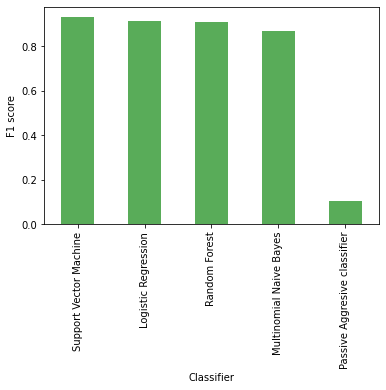

In [ ]:
results_ht.sort_values('F1 Test', ascending=False, inplace=True)
results_ht['F1 Test'].plot(kind = 'bar', facecolor='g', alpha=0.65)
plt.xlabel('Classifier')
plt.ylabel('F1 score')
plt.show()

## 7.2. Summary
>The best 3 performing model before hyperparameter tuning are Passive Aggressive Classifier, Random Forest Classifier and Logistic Regression.

> The best 3 performing model after hyperparameter tuning are Support Vector Machine, Logistic Regression and Random Forest Classifier.

### Logging Results to Comet

In [ ]:
# Generates two dictionaries, parameters and metric values
params = {
    'random_state': RANDOM_STATE,
    'model_type': 'Logistics Regression'
}

metrics ={
    'Accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1-score': f1-test
}
metrics

NameError: ignored

### Log parameters and metrics to commet_ml

In order to adher to a fundamental pricinple of programming **DRY**(do not repeat yourself), we define a function **experiment_logger** to achieve this. This is because this is a group project with multiple comet_ml API keys. 

In [ ]:
def experiment_logger(experiments):
    """
        This function takes in a list of comet_ml defined experiments, and logs the parameters and metric values,
        for this notebook to the respective experiments. It has a return value of None
    """
    for experiment in experiments :
        experiment.log_parameters(params)
        experiment.log_metrics(metrics)
    return None

In [ ]:
# Create a list of comet experiments for this project
comet_experiments = [ experiment]

# Log the respective experiments parameter and metric values
experiment_logger(comet_experiments)

### End all comet experiment after loging the parameters
To adhere to the DRY principle, we write a function end_comet to achieve this

In [ ]:
def end_comet(experiments):
    """
        This function takes in a list of comet_ml defined experiments, and ends the experiments.
        It has a return value of None.
    """
    for experiment in experiments :
        experiment.end()
        
    return None

In [ ]:
# End all experiments
end_comet(comet_experiments)

NameError: ignored

<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

## 8.1 Conclusion
> In this notebook we were able to utilize 5 models and evaluate their performance using the train data. The following models are:

>1. Logistic Regression
>2. Passive Aggressive Classifier
>3. Support Vector Machines
>4. Random Forest Classifier
>5. MultinomialNB

> Before hyperparameter tuning the Passive Aggressive Classifier and Random Forest Classifier had the best accuracy and F1-scores. However after hyperparameter tuning the Support Vector Machine and Logistic Regression models were the best performing.

> However when the models were exposed to the test data the **Logistic Regression model** with default hyperparameters performed the best with F1-score of 0.73435

>**Key Limitations**

>The models overfitting with the train data even after hyperparameter tuning.
>Computing power is a limiting factor in sentiment analysis.


>**Recommendations**

> Metadata about location can inform context given the connection between climate change and politics.

> Timestamps provide context in text data analysis.

> Natural Language Processing improves with exposure to additional data.

